## Back Propagation from Scratch
These are my learning notes from looking at the process of back propagation in ANNs and learning how this works mathematically.

![3D Cube With Measurements](assets/images/cube.png)


I thought I'd start with something simple. So imagine a simple 3-dimensional object whose volume is represented by the equation $vol = w.h.l$ where $w$ is width, $h$ is height and $l$ is length. In this structure length and height are unknown and we want to find length and height by measuring the change of volume with respect to changes in width. We should then be able to using a training process to discover the values for height and length.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random

Let's start by defining the height and length which are the values we're going to see if we can derive by using the chain rule and back propagation.

In [38]:
ACTUAL_HEIGHT = 20
ACTUAL_LENGTH = 60

The next thing we need to do is to create some training data.

In [39]:
width_train = np.arange(start=0, stop=100, step=1)
volume_train = np.array([w * ACTUAL_HEIGHT * ACTUAL_LENGTH for w in width_train])

Plot volume with respect to width so we can visualise it. 

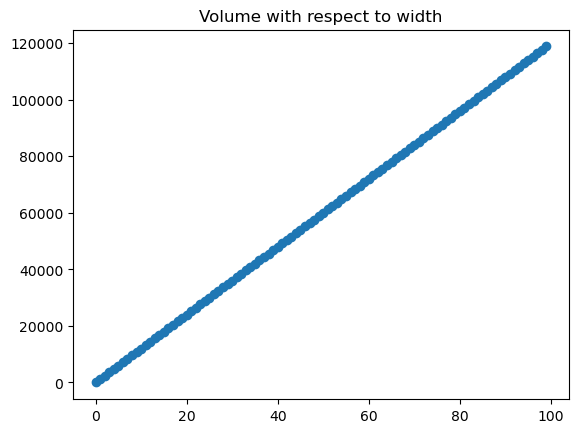

In [40]:
plt.scatter(width_train, volume_train)
plt.title('Volume with respect to width')
plt.show()

In [41]:
calculated_height = random.randint(0, 100)
calculated_length = random.randint(0, 100)
print(f'Starting height: {calculated_height} Starting length: {calculated_length}')

Starting height: 12 Starting length: 7


## The Chain Rule
The chain rule in differentiation is the mechanism by which complex curves can be differentated by multiplying together the various components. The equation for the chain rule is: 

$${dy\over{dx}} = {dy\over{du}}{du\over{dx}}$$

## Back propagation
In the process of back propagation, we use the chain rule to calculate the gradient of the loss function with respect to each weight, one layer at a time.

$${dl\over{dw_{1}}} = {dl\over{dw_{2}}}{dw_{2}\over{dw_{1}}}$$

In our example, we have 2 'weights', one represents the height and the other represents the length. 

In [42]:
def calculate_loss(predicted, actual):
    """
    Returns the Mean Square Error loss of the predicted vs actual values.
    
    """
    errors = predicted - actual
    mse = (1. / np.size(predicted)) * np.sum(np.square(errors))
    grad = np.mean(errors * 2)
    return mse, grad

In [43]:
a = np.array([i * ACTUAL_HEIGHT * ACTUAL_LENGTH for i in range(100)])
print(a)

[     0   1200   2400   3600   4800   6000   7200   8400   9600  10800
  12000  13200  14400  15600  16800  18000  19200  20400  21600  22800
  24000  25200  26400  27600  28800  30000  31200  32400  33600  34800
  36000  37200  38400  39600  40800  42000  43200  44400  45600  46800
  48000  49200  50400  51600  52800  54000  55200  56400  57600  58800
  60000  61200  62400  63600  64800  66000  67200  68400  69600  70800
  72000  73200  74400  75600  76800  78000  79200  80400  81600  82800
  84000  85200  86400  87600  88800  90000  91200  92400  93600  94800
  96000  97200  98400  99600 100800 102000 103200 104400 105600 106800
 108000 109200 110400 111600 112800 114000 115200 116400 117600 118800]


In [44]:
p = np.array([i * calculated_height * calculated_length for i in range(100)])
print(p)

[   0   84  168  252  336  420  504  588  672  756  840  924 1008 1092
 1176 1260 1344 1428 1512 1596 1680 1764 1848 1932 2016 2100 2184 2268
 2352 2436 2520 2604 2688 2772 2856 2940 3024 3108 3192 3276 3360 3444
 3528 3612 3696 3780 3864 3948 4032 4116 4200 4284 4368 4452 4536 4620
 4704 4788 4872 4956 5040 5124 5208 5292 5376 5460 5544 5628 5712 5796
 5880 5964 6048 6132 6216 6300 6384 6468 6552 6636 6720 6804 6888 6972
 7056 7140 7224 7308 7392 7476 7560 7644 7728 7812 7896 7980 8064 8148
 8232 8316]


In [45]:
cost, grad = calculate_loss(p, a)
print(cost)
print(grad)

4089454776.0
-110484.0
